In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [127]:
df = pd.read_csv("BTB_dev.csv")

In [128]:
df.head()

,Unnamed: 0,object_id,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,...,true_vpec,true_rv,true_av,true_peakmjd,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
0,0,615,349.0461,-61.9438,1,0.000,0.000,0.000,-9.000,0.017,...,0.0,0.0,0.0,59570.000,484.7,3286.7,3214.1,3039.7,2854.5,2837.0
1,1,713,53.0859,-27.7844,1,1.818,1.627,0.255,45.406,0.007,...,0.0,0.0,0.0,59570.000,108.7,117.7,119.9,149.6,147.9,150.5
2,2,730,33.5742,-6.5796,1,0.232,0.226,0.016,40.256,0.021,...,4.5,0.0,0.0,60444.379,0.0,0.0,0.0,0.0,0.0,0.0
3,3,745,0.1899,-45.5867,1,0.304,0.281,1.152,40.795,0.007,...,257.7,0.0,0.0,60130.453,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1124,352.7113,-63.8237,1,0.193,0.241,0.018,40.417,0.024,...,-368.8,0.0,0.0,60452.641,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
df = df.drop("Unnamed: 0", axis=1).drop("object_id", axis=1)

## EDA

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ra                  7848 non-null   float64
 1   decl                7848 non-null   float64
 2   ddf_bool            7848 non-null   int64  
 3   hostgal_specz       7848 non-null   float64
 4   hostgal_photoz      7848 non-null   float64
 5   hostgal_photoz_err  7848 non-null   float64
 6   distmod             7848 non-null   float64
 7   mwebv               7848 non-null   float64
 8   target              7848 non-null   int64  
 9   true_distmod        7848 non-null   float64
 10  true_lensdmu        7848 non-null   float64
 11  true_vpec           7848 non-null   float64
 12  true_rv             7848 non-null   float64
 13  true_av             7848 non-null   float64
 14  true_peakmjd        7848 non-null   float64
 15  tflux_u             7848 non-null   float64
 16  tflux_

In [131]:
df.describe()

,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,true_distmod,...,true_vpec,true_rv,true_av,true_peakmjd,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
count,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,...,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000,7848.000000
mean,169.719382,-27.254849,0.269623,0.254438,0.357882,0.155699,26.373072,0.081953,60.895387,28.661084,...,2.137322,0.474006,0.032735,59946.827096,265.646152,2066.388277,2523.983869,2427.426555,2320.092775,2121.793756
std,114.212761,20.248556,0.443792,0.330056,0.545547,0.300364,23.030558,0.150598,28.767984,18.665605,...,243.315940,1.115749,0.127110,368.889675,1139.764604,9840.254171,12007.001716,10225.545751,8559.673003,7687.389494
min,0.175800,-64.760900,0.000000,0.000000,0.000000,0.000000,-9.000000,0.003000,6.000000,0.000000,...,-1096.800000,0.000000,0.000000,58220.414000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.402300,-44.598000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.018000,42.000000,0.000000,...,-85.000000,0.000000,0.000000,59570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,150.996100,-27.279600,0.000000,0.183000,0.210000,0.018000,40.078500,0.032000,65.000000,39.736000,...,0.000000,0.000000,0.000000,59875.762000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,282.875950,-8.838300,1.000000,0.350000,0.431000,0.122250,41.877000,0.076000,90.000000,41.346000,...,100.125000,0.000000,0.000000,60265.803000,25.350000,131.550000,287.225000,705.550000,805.000000,694.000000
max,359.824200,4.181500,1.000000,3.445000,2.999000,1.735000,47.026000,2.747000,95.000000,47.386000,...,1181.600000,3.100000,2.330000,61197.316000,29042.200000,161508.600000,180588.000000,151136.900000,166923.300000,186648.000000


In [132]:
df.tail()

,ra,decl,ddf_bool,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target,true_distmod,...,true_vpec,true_rv,true_av,true_peakmjd,tflux_u,tflux_g,tflux_r,tflux_i,tflux_z,tflux_y
7843,26.7188,-14.9403,0,0.000,0.000,0.000,-9.000,0.013,65,0.000,...,0.0,0.0,0.0,59570.000,26.4,267.6,742.8,3295.1,6047.5,7955.2
7844,120.1013,-62.6967,0,0.172,2.561,1.115,46.611,0.136,90,39.595,...,-12.8,0.0,0.0,60056.809,0.0,0.0,0.0,0.0,0.0,0.0
7845,203.1081,-55.6821,0,0.000,0.000,0.000,-9.000,0.430,16,0.000,...,0.0,0.0,0.0,59570.000,83.8,1124.7,1445.1,1191.2,848.9,382.5
7846,79.1016,-35.5018,0,0.000,0.000,0.000,-9.000,0.034,65,0.000,...,0.0,0.0,0.0,59570.000,1.9,14.4,49.4,244.3,534.8,897.2
7847,301.9922,-17.4263,0,0.000,0.000,0.000,-9.000,0.091,6,0.000,...,0.0,0.0,0.0,59905.160,6134.1,23008.9,36299.5,41257.7,43047.7,44230.7


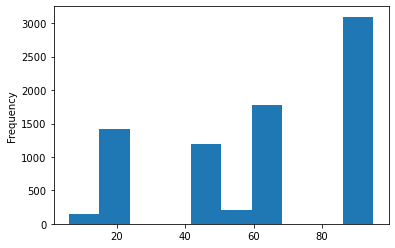

In [133]:
df.target.plot.hist();

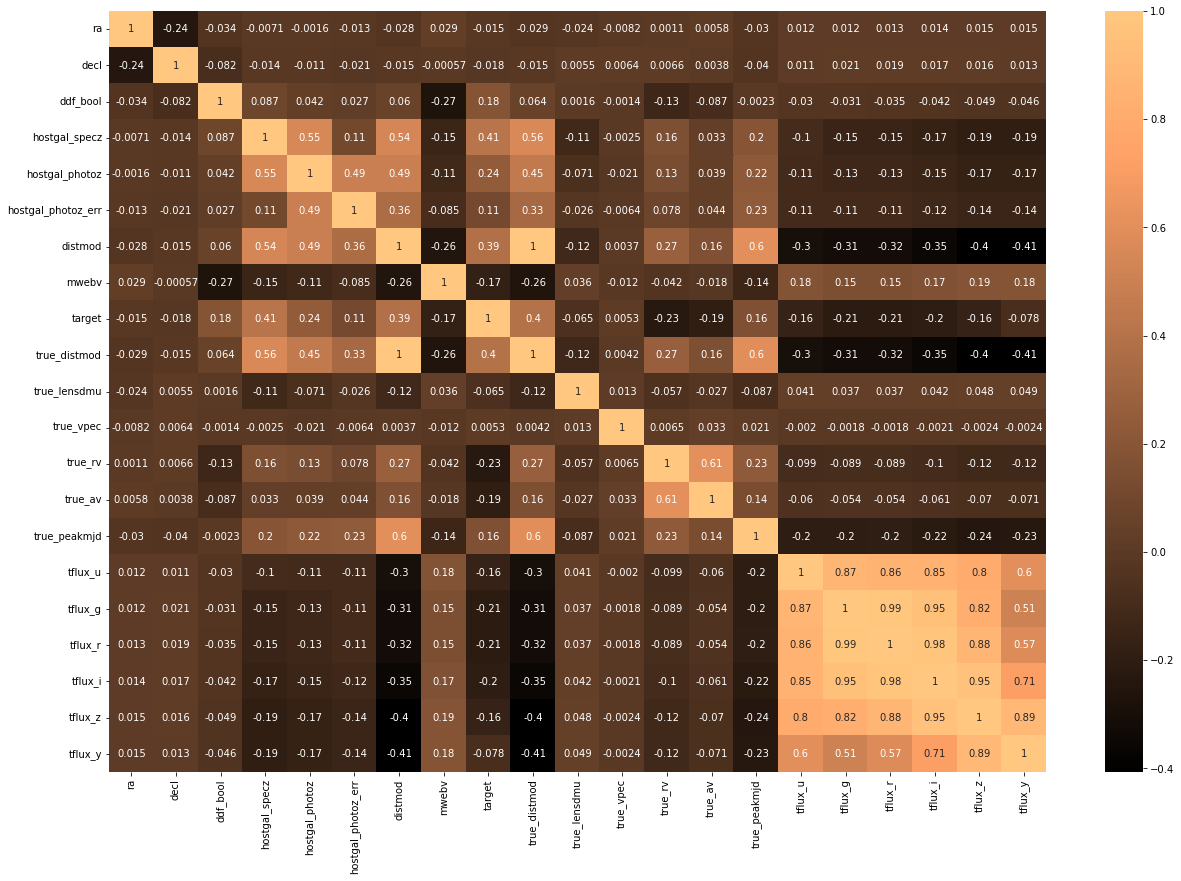

In [134]:
plt.figure(figsize=(21, 14))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap="copper")
plt.show()

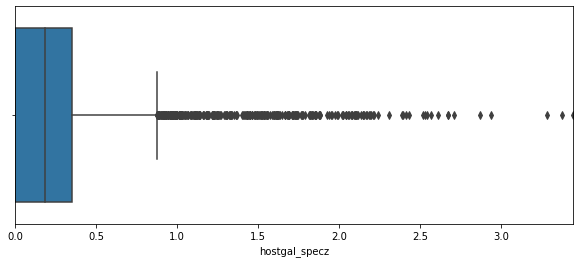

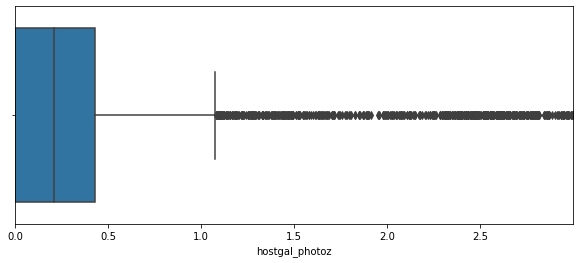

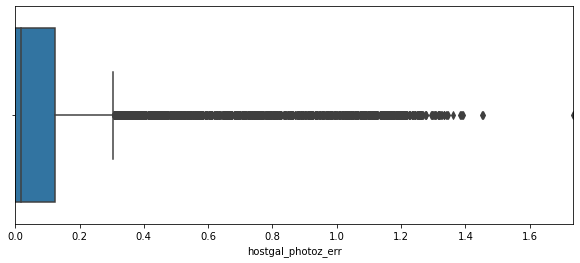

In [135]:
for col in  ["hostgal_specz", "hostgal_photoz", "hostgal_photoz_err"]:
  plt.figure(figsize=(10,4))
  plt.xlim(df[col].min(), df[col].max())
  sns.boxplot(x=df[col])

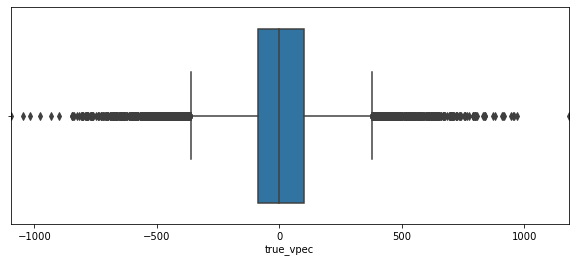

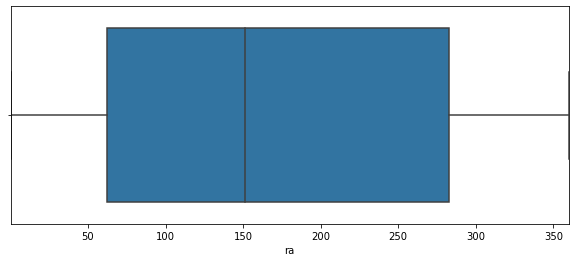

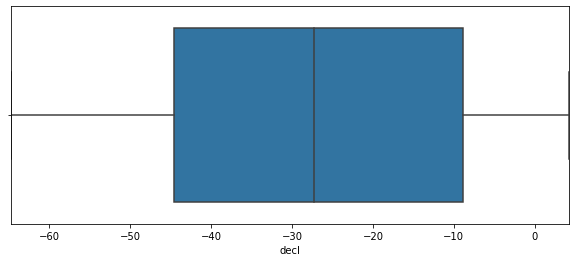

In [149]:
for col in  ["true_vpec", "ra", "decl"]:
  plt.figure(figsize=(10,4))
  plt.xlim(df[col].min(), df[col].max())
  sns.boxplot(x=df[col])

## Resampling and removing features with low correlation

In [137]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [138]:
X = df.drop("target", axis=1).drop("ra", axis=1).drop("decl", axis=1).drop("true_vpec", axis=1)
Y = df["target"]

In [139]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7)

## Scaling

In [141]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler().fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training

In [142]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
Y_preds = model.predict(X_test)

In [143]:
model.score(X_test, Y_test)

0.8523932063818837

## Accuracy= 0.852

## Classification Report:

In [158]:
from sklearn.metrics import classification_report
rep = classification_report(Y_test, Y_preds)
print("Classification Report:",)
print(rep)

Classification Report:
              precision    recall  f1-score   support

           6       1.00      1.00      1.00       667
          15       0.75      0.73      0.74       683
          16       1.00      1.00      1.00       722
          42       0.39      0.38      0.39       704
          52       0.58      0.64      0.61       697
          53       1.00      1.00      1.00       684
          62       0.61      0.63      0.62       713
          64       0.92      0.95      0.93       700
          65       1.00      1.00      1.00       697
          67       0.64      0.59      0.61       730
          88       1.00      1.00      1.00       676
          90       0.55      0.52      0.53       643
          92       1.00      1.00      1.00       693
          95       0.96      0.95      0.96       706

    accuracy                           0.81      9715
   macro avg       0.81      0.81      0.81      9715
weighted avg       0.81      0.81      0.81      9715

